# Logistic Regression , K-Nearest Neighbours and Naive Bayes Theorem

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [204]:
df = pd.read_csv(r'mushrooms.csv')
df1 = df.copy()

In [205]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [206]:
print(f'No of rows : {df.shape[0]}')
print(f'No of columns : {df.shape[1]}')

No of rows : 8124
No of columns : 23


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [208]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [209]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

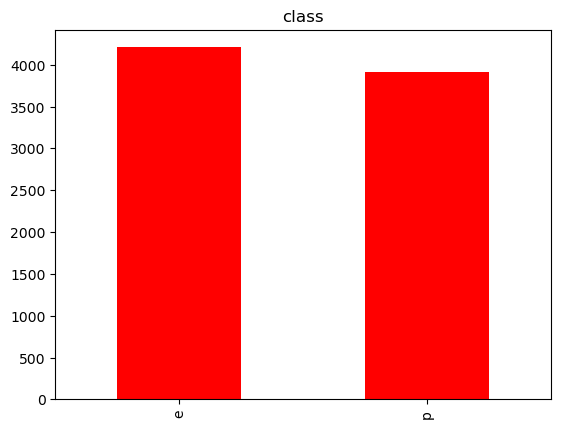

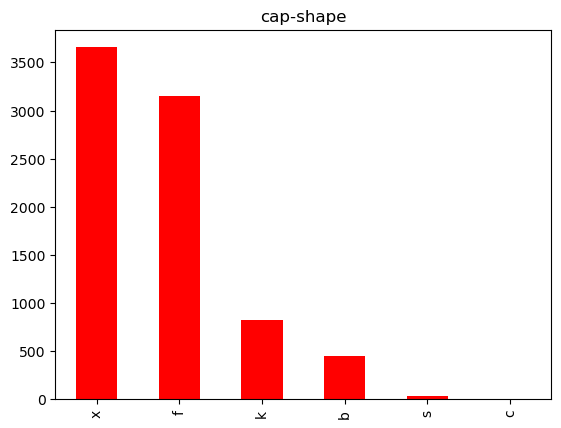

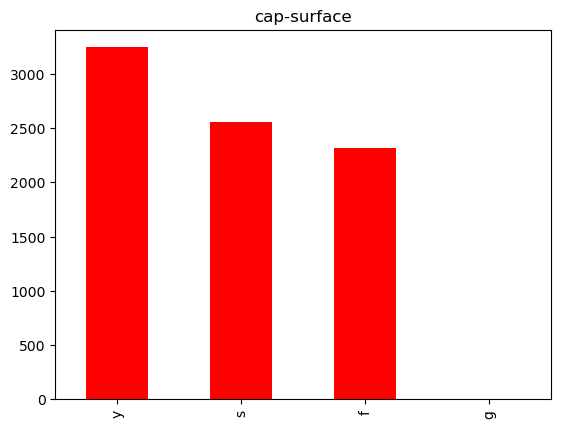

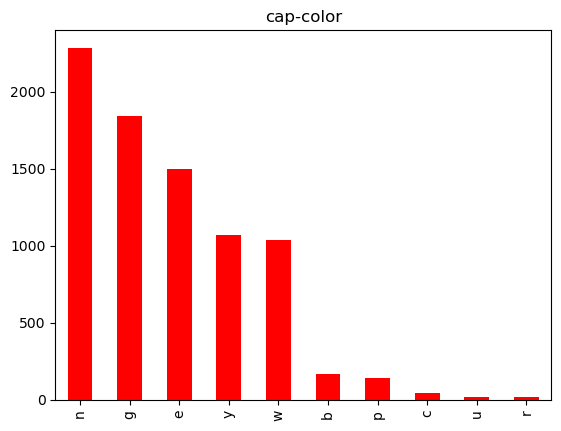

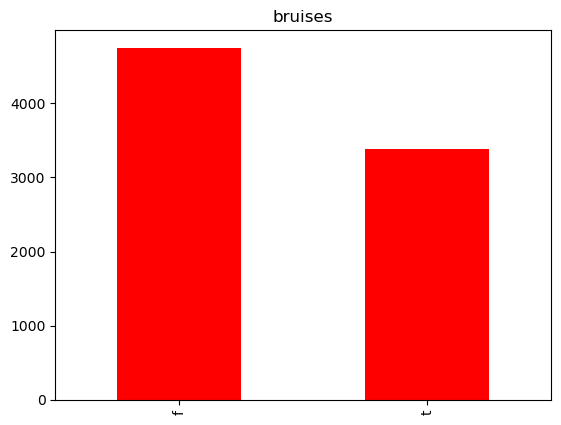

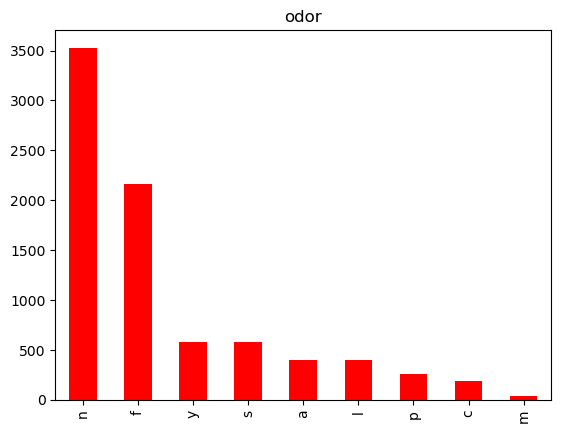

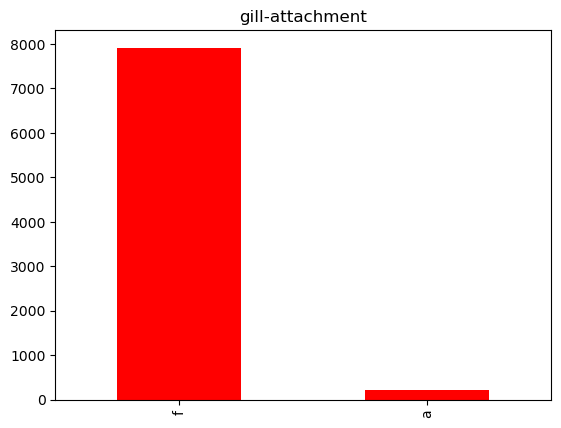

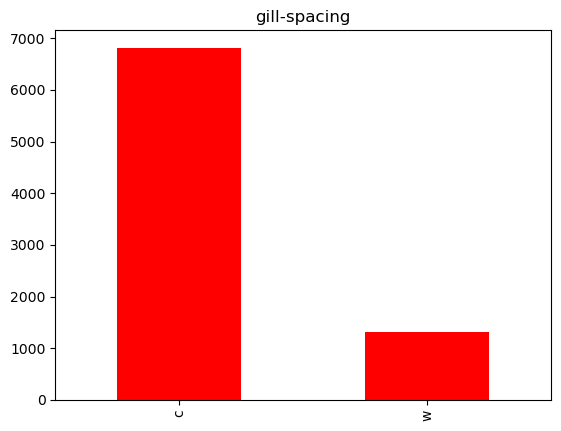

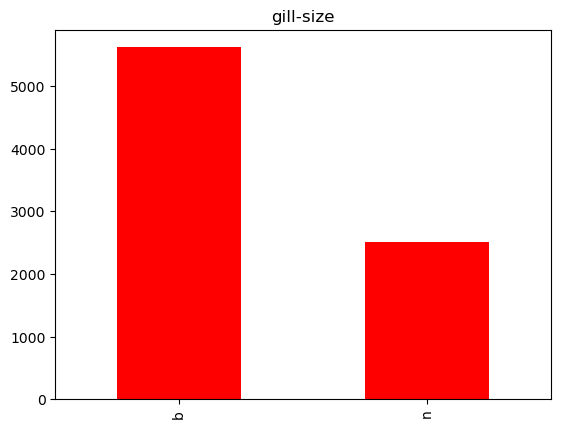

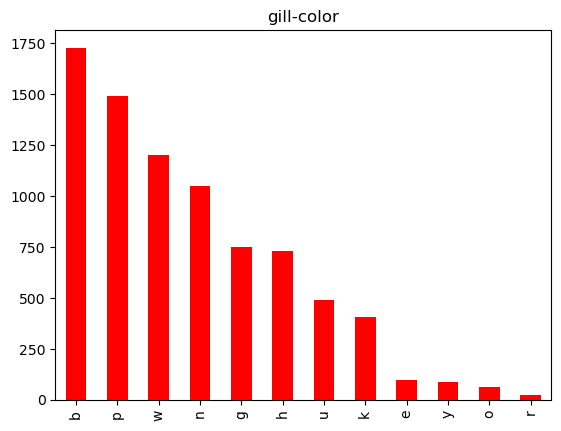

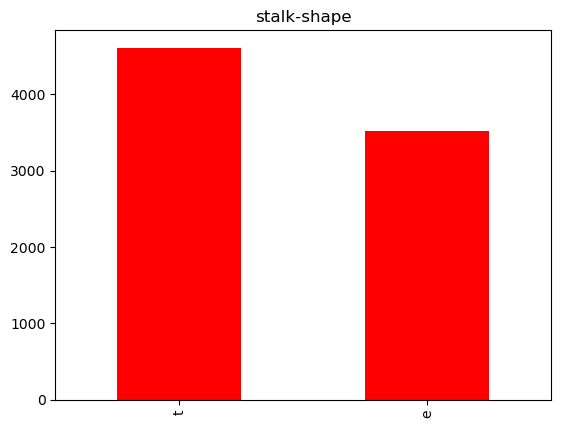

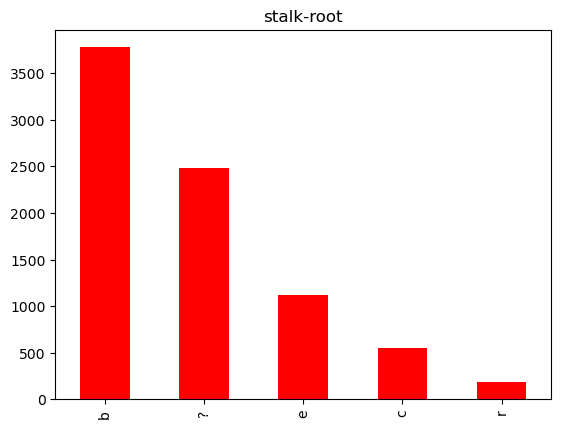

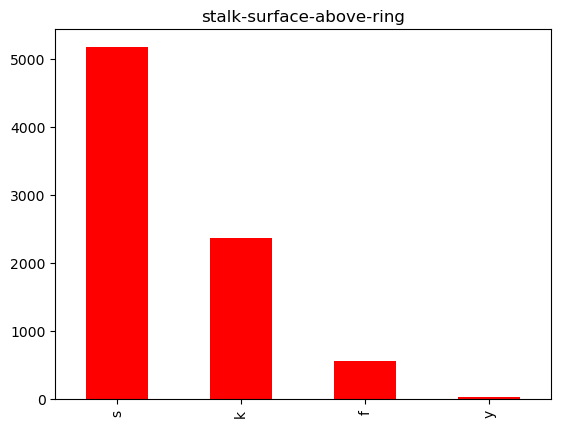

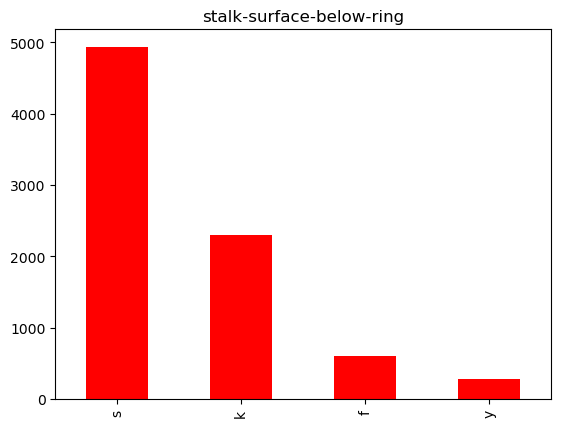

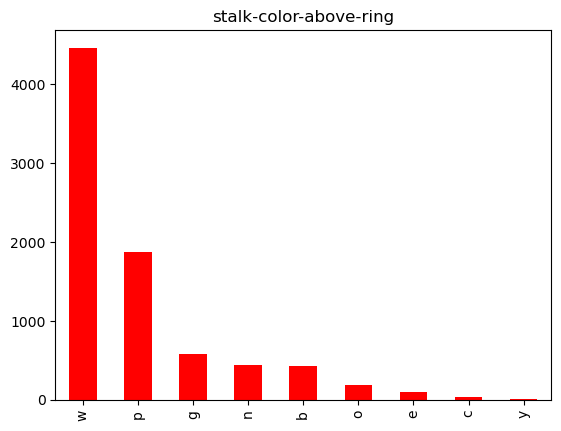

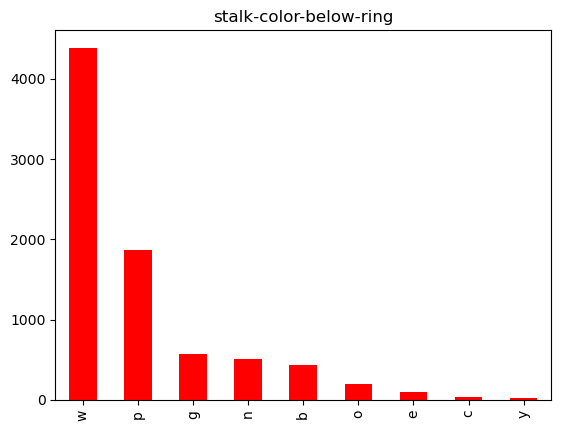

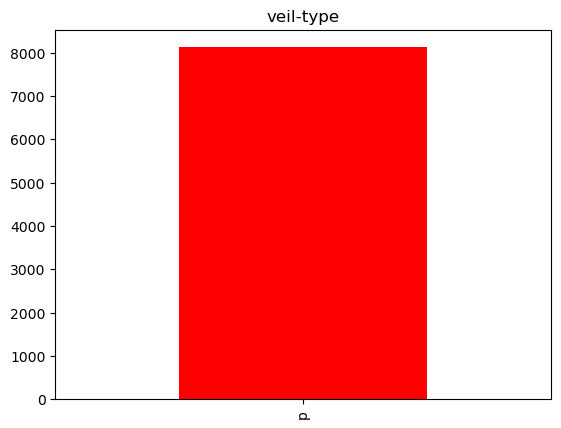

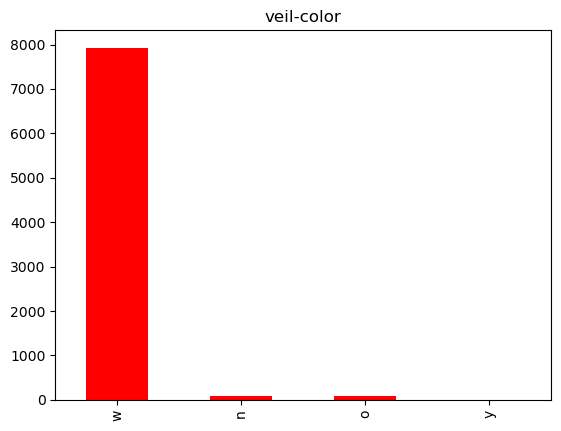

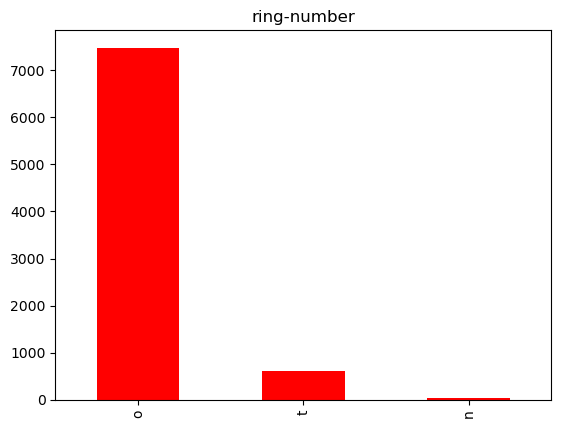

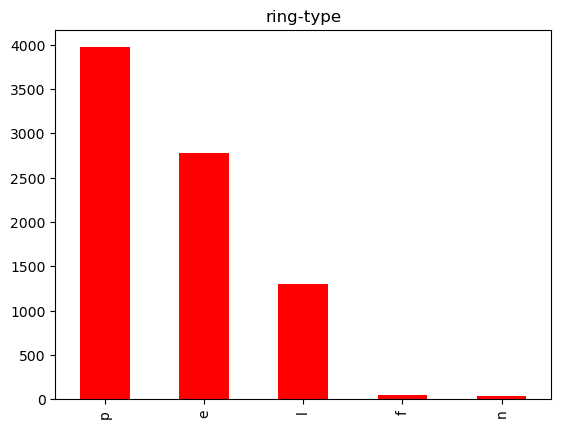

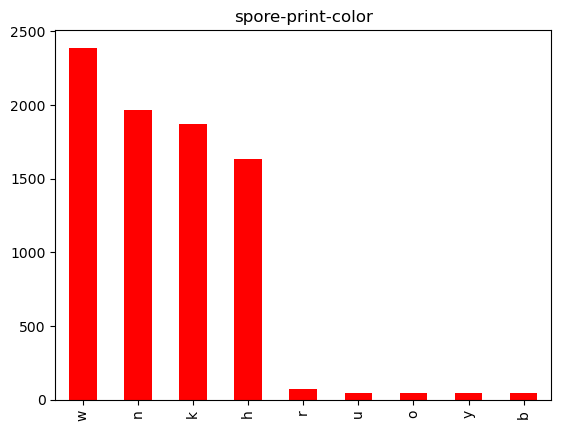

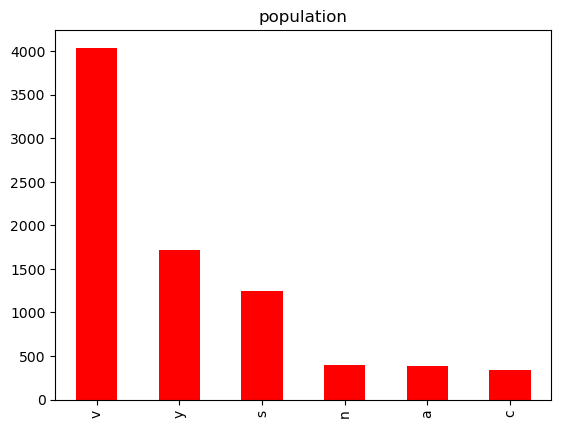

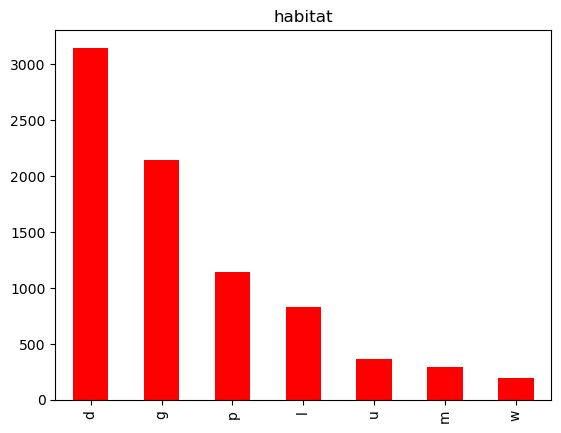

In [210]:
for i in df:
    plt.figure()
    df[i].value_counts().plot(kind='bar',color='red')
    plt.title(i)
    plt.show()

In [211]:
le =  LabelEncoder()
for i in df1:
    df1[i] = le.fit_transform(df1[i])

In [212]:
df1.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [213]:
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [214]:
x = df1.iloc[:,1:]
y = df1.iloc[:,0]

In [215]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

In [216]:
print(f'No of x train rows : {x_train.shape}')
print(f'No of x test columns : {x_test.shape}')
print(f'No of y train rows : {y_train.shape}')
print(f'No of y test columns : {y_test.shape}')

No of x train rows : (5686, 22)
No of x test columns : (2438, 22)
No of y train rows : (5686,)
No of y test columns : (2438,)


In [217]:
sc = StandardScaler()

In [218]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [219]:
reg = LogisticRegression(max_iter=10000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [220]:
y_pred_reg = reg.predict(x_test)

In [221]:
confusion_matrix(y_test,y_pred_reg)

array([[1197,   60],
       [  59, 1122]], dtype=int64)

In [222]:
reg_accuracy = accuracy_score(y_test,y_pred_reg)
reg_accuracy

0.9511894995898277

In [223]:
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1257
           1       0.95      0.95      0.95      1181

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



In [224]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [225]:
y_pred_nb = nb.predict(x_test)

In [226]:
confusion_matrix(y_test,y_pred_nb)

array([[1172,   85],
       [  87, 1094]], dtype=int64)

In [227]:
nb_accuracy = accuracy_score(y_test,y_pred_nb)
nb_accuracy

0.9294503691550451

In [228]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1257
           1       0.93      0.93      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.93      0.93      0.93      2438
weighted avg       0.93      0.93      0.93      2438



Text(0, 0.5, 'Error Rate')

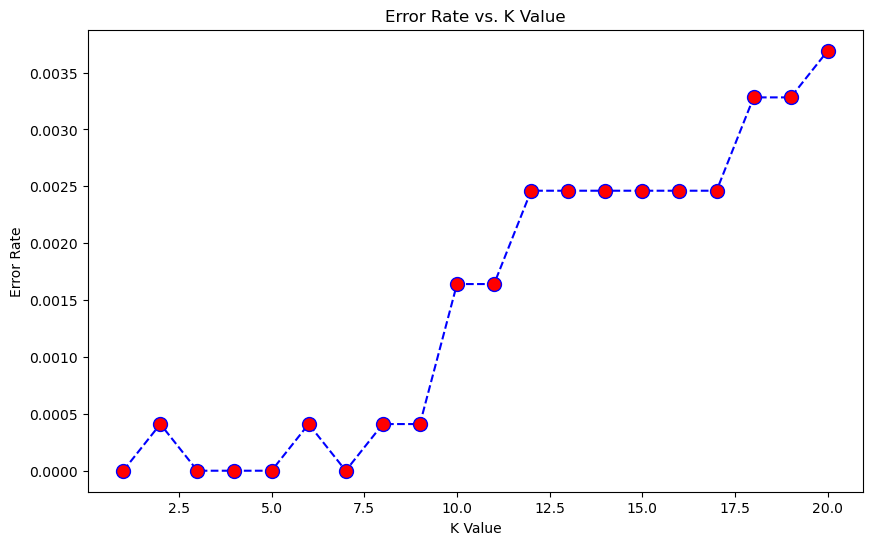

In [229]:
error = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_y_knn = knn.predict(x_test)
    error.append(np.mean(pred_y_knn != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,21),error,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [230]:
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

Minimum error:- 0.0 at K = 0


In [231]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [232]:
y_pred_knn = knn.predict(x_test)

In [233]:
confusion_matrix(y_test,y_pred_knn)

array([[1257,    0],
       [   0, 1181]], dtype=int64)

In [234]:
knn_accuracy = accuracy_score(y_test,y_pred_knn)
knn_accuracy

1.0

In [235]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [236]:
accuracy = pd.DataFrame({'Logistic Regression Accuracy':reg_accuracy,'Naive Bayes Accuracy':nb_accuracy,'KNN Accuracy':knn_accuracy},index=['Accuracy'])

In [237]:
accuracy.T.style.background_gradient(cmap="coolwarm")

,Accuracy
Logistic Regression Accuracy,0.951189
Naive Bayes Accuracy,0.929450
KNN Accuracy,1.000000
